# Hausaufgabe 2: Gradient Descent
06.11.2021, Thomas Iten

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
plt.rcdefaults()

## Initialisierung X

init_mode | Beschreibung
--------- | ------------
random    | Initialiserung via Zufallszahlen mit je 500 Werten
linespace | Initialisierung mit numpay linspace mit je 50 Werten
default   | Einfache initialierung mit je 10 Werten

<br />

In [106]:
init_mode = "random"   # set init mode ["default", "random"]

print("Initialisierung X mit Modus:", init_mode)

if init_mode == "random":
    N   = 500
    X_1 = np.random.randn(N)
    X_2 = np.random.randn(N)
    X_3 = np.random.randn(N)
    print("X_1 shape =", X_1.shape)
    print("X_2 shape =", X_2.shape)
    print("X_3 shape =", X_3.shape)

elif init_mode == "linspace":
    N   = 50
    X_1 = np.linspace(0,1,N)
    X_2 = np.linspace(1,2,N)
    X_3 = np.linspace(2,3,N)
    print("X_1 shape =", X_1.shape)
    print("X_2 shape =", X_2.shape)
    print("X_3 shape =", X_3.shape)

else:
    N = 10
    X_1 = list(range(0, N))
    X_2 = list(range(N, 2*N))
    X_3 = list(range(2*N, 3*N))
    print("X_1 =", X_1)
    print("X_2 =", X_2)
    print("X_3 =", X_3)

Initialisierung X mit Modus: random
X_1 shape = (500,)
X_2 shape = (500,)
X_3 shape = (500,)


## Aktivierungsfunktion Y
- Modulation der Inputs
- Aktivierungsfunktion Y (Schalter ein/aus)

**Formel:**<br />
Y = f_1 * x_1 + f_2 * x_2 + f_3 * x_3 + bias


In [107]:
f_1 = 2
f_2 = 5
f_3 = 3
bias= 6

Y = [f_1*x_1 + f_2*x_2 + f_3*x_3 + bias for x_1, x_2, x_3 in zip(X_1, X_2, X_3)] # ein Axon, immer nur eins, Function -

print("Aktivierungsfunktion Y:")
print("Y[:10] =", Y[:10])

Aktivierungsfunktion Y:
Y[:10] = [-1.2709309072174113, 15.423625272434775, 7.690024458079698, -4.134919344950202, 9.938040913992321, 3.4782912026831116, 5.5790414532665835, 13.981197050457691, 1.7400720991957765, 5.3090723174562395]


## Update weights
**Formel:**

$MSE = 1/N\sum_{i=0} ^N (Y_i - (mX_i + b))^2$

**Ableitung MSE:**
- Berechnung parielle Ableitungen
- -x (innere Ableitung) * 2(y - (mx + b))

In [108]:
def update_weights(m_1, m_2, m_3, b, X_1, X_2, X_3, Y, learning_rate):
    m_1_deriv = 0
    m_2_deriv = 0
    m_3_deriv = 0
    b_deriv   = 0

    # Ableitung MSE
    for i in range(N): # pytorch - backward # gradient tape
        # Calculate partial derivatives
        # -x (innere Ableitung) * 2(y - (mx + b)) (äussere Ableitung)
        m_1_deriv += -2*X_1[i] * (Y[i] - (m_1*X_1[i] + m_2*X_2[i] + m_3*X_3[i] + b))
        m_2_deriv += -2*X_2[i] * (Y[i] - (m_1*X_1[i] + m_2*X_2[i] + m_3*X_3[i] + b))
        m_3_deriv += -2*X_3[i] * (Y[i] - (m_1*X_1[i] + m_2*X_2[i] + m_3*X_3[i] + b))

        # -2(y - (mx + b))
        b_deriv += -2*(Y[i] - (m_1*X_1[i] + m_2*X_2[i] + m_3*X_3[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    m_1 -= (m_1_deriv / float(N)) * learning_rate # später - in pytorch step
    m_2 -= (m_2_deriv / float(N)) * learning_rate
    m_3 -= (m_3_deriv / float(N)) * learning_rate
    b   -= (b_deriv   / float(N)) * learning_rate

    # Save to history
    history_m.append([m_1, m_2, m_3])
    history_b.append(b)

    # Return weights and bias
    return m_1, m_2, m_3, b

## Train

In [109]:
def train(epochs):
    m_1 = 0
    m_2 = 0
    m_3 = 0
    b   = 0
    learning_rate = 0.01
    for i in range(epochs):
        # abbruchskriterium - "early stopping"
        m_1, m_2, m_3, b = update_weights(m_1, m_2, m_3, b, X_1, X_2, X_3, Y, learning_rate)
    return m_1, m_2, m_3, b

epochs = 1000
history_m = []
history_b = []

train(epochs)

# plt.plot(history_m)


(2.0000000051946887, 4.999999993963644, 2.99999999997929, 5.999999988986172)

## Show results

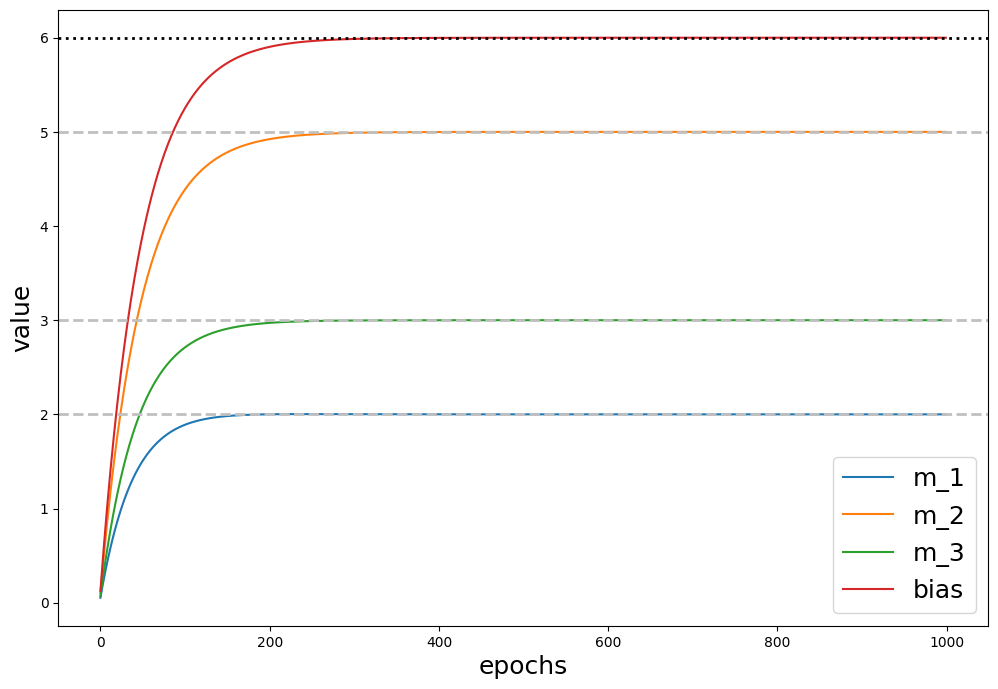

In [110]:
plt.figure(figsize=(12,8))
plt.plot(history_m[0:epochs])
plt.plot(history_b[0:epochs])

plt.axhline(y=f_1,  xmin=0, xmax=epochs, c='silver', linewidth=2, linestyle='--')
plt.axhline(y=f_2,  xmin=0, xmax=epochs, c='silver', linewidth=2, linestyle='--')
plt.axhline(y=f_3,  xmin=0, xmax=epochs, c='silver', linewidth=2, linestyle='--')
plt.axhline(y=bias, xmin=0, xmax=epochs, c='black',  linewidth=2, linestyle=':')

plt.ylabel('value', fontsize= 18)
plt.xlabel('epochs',fontsize= 18)
plt.legend(['m_1', 'm_2', 'm_3','bias'], loc='best', fontsize= 18);